In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


In [11]:
work= pd.read_csv('data1.csv')
work[np.isfinite(work).all(1)]
work.head()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [117]:
work.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,'Owner']],NaN


In [118]:
work.shape

(317, 9)

In [119]:
work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    float64
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    float64
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   302 non-null    object 
 8   Owner          301 non-null    float64
dtypes: float64(5), object(4)
memory usage: 22.4+ KB


In [120]:
work.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [121]:
work.duplicated().sum()

16

In [122]:
work.isnull().sum()

Car_Name         16
Year             16
Selling_Price    16
Present_Price    16
Kms_Driven       16
Fuel_Type        16
Seller_Type      16
Transmission     15
Owner            16
dtype: int64

In [123]:
work.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [124]:
def null_values(work):
    return round((work.isnull().sum()*100/len(work)).sort_values(ascending = False),2)


In [125]:
work.value_counts()

Car_Name           Year    Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
fortuner           2015.0  23.00          30.61          40000.0     Diesel     Dealer       Automatic     0.0      2
ertiga             2016.0  7.75           10.79          43000.0     Diesel     Dealer       Manual        0.0      2
800                2003.0  0.35           2.28           127000.0    Petrol     Individual   Manual        0.0      1
ertiga             2015.0  6.10           7.71           26000.0     Petrol     Dealer       Manual        0.0      1
etios g            2014.0  4.75           6.76           40000.0     Petrol     Dealer       Manual        0.0      1
                                                                                                                   ..
Yamaha FZ S V 2.0  2015.0  0.55           0.84           58000.0     Petrol     Individual   Manual        0.0      1
                           0.48           0.84           2300

<Figure size 1000x1000 with 0 Axes>

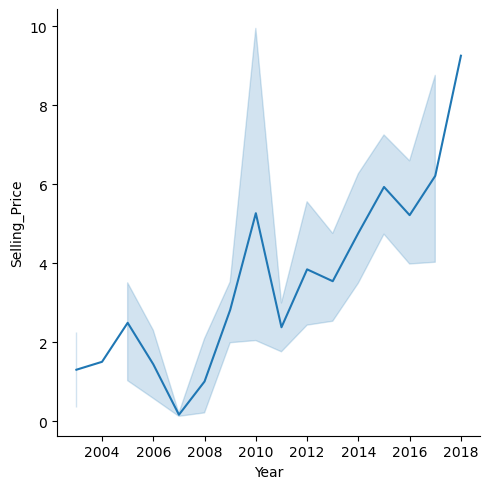

In [126]:
fig=plt.figure(figsize=(10,10))
sns.relplot('Year','Selling_Price',data=work,kind='line')

In [127]:
work['Selling_Price'].describe()

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

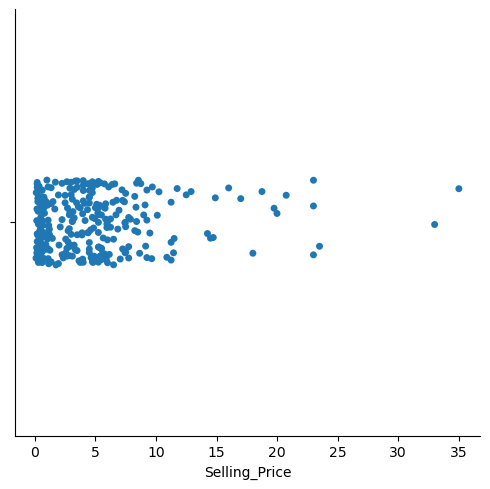

In [128]:
sns.catplot('Selling_Price',data=work)

<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

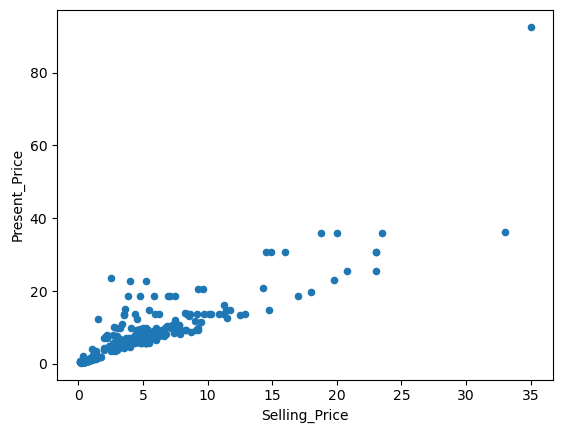

In [129]:
work.plot.scatter(x='Selling_Price',y='Present_Price')

<AxesSubplot:xlabel='Year', ylabel='count'>

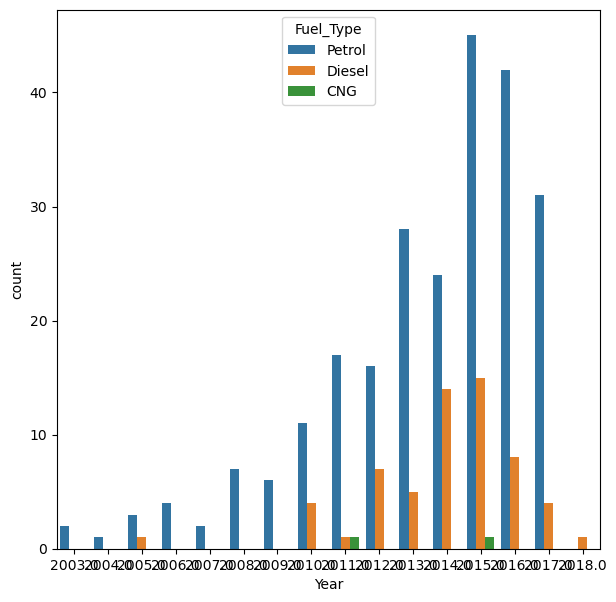

In [130]:
plt.figure(figsize=(7,7))
sns.countplot('Year',hue='Fuel_Type',data=work)

<Figure size 400x400 with 0 Axes>

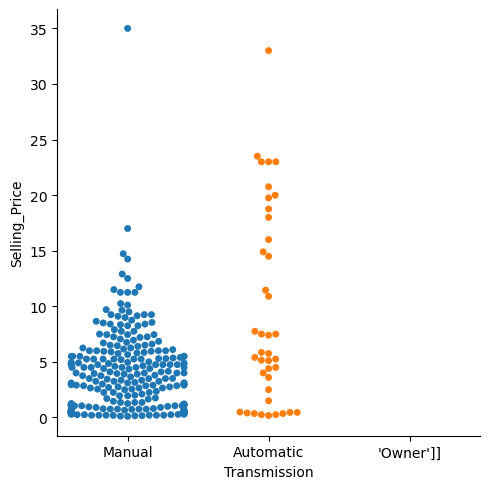

In [131]:
plt.figure(figsize=(4,4))
sns.catplot(data=work,kind="swarm",x="Transmission",y="Selling_Price",split=True)

<AxesSubplot:xlabel='Selling_Price', ylabel='Kms_Driven'>

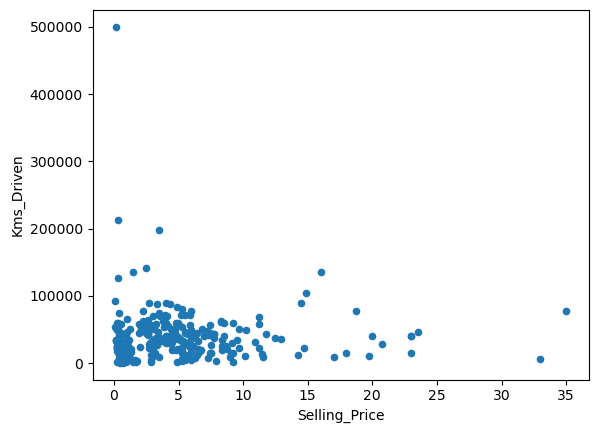

In [132]:
work.plot.scatter('Selling_Price','Kms_Driven')

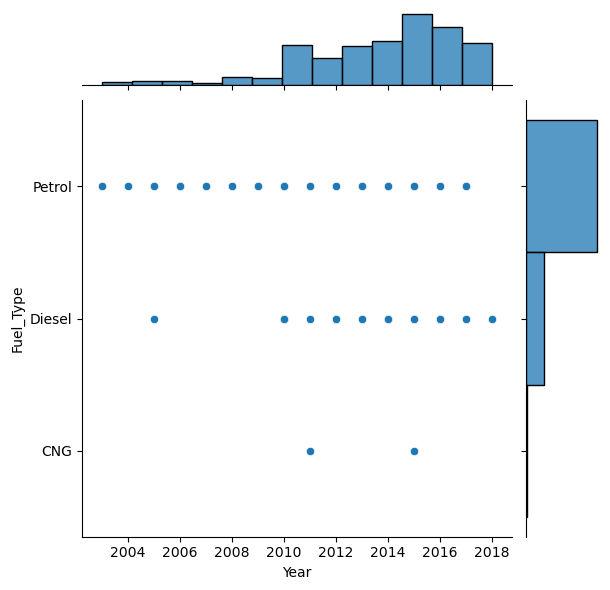

In [133]:
sns.jointplot(data=work,x="Year",y="Fuel_Type")

<AxesSubplot:xlabel='Selling_Price', ylabel='Seller_Type'>

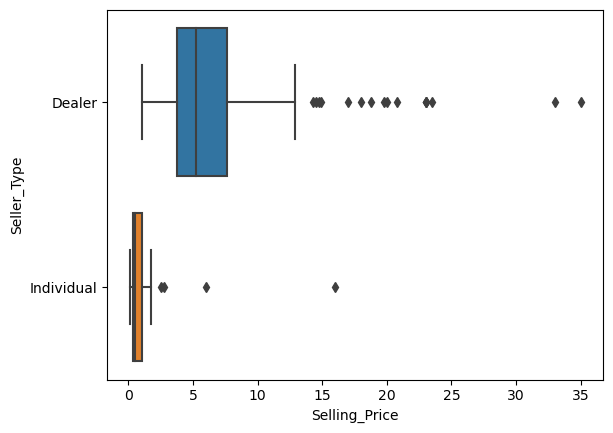

In [134]:
sns.boxplot(x='Selling_Price',y="Seller_Type",data=work)

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

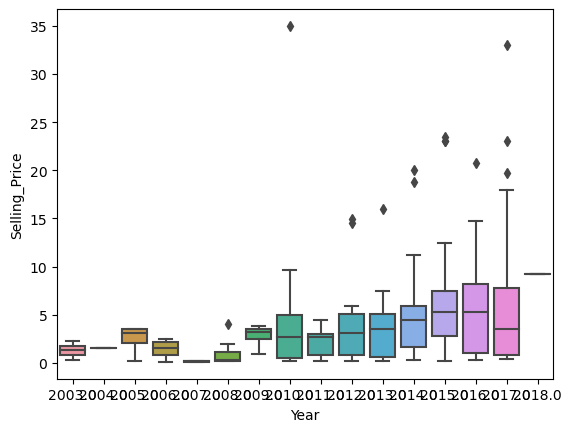

In [135]:
sns.boxplot(x='Year', y="Selling_Price",data=work)

In [136]:
work.drop('Car_Name',axis=1,inplace=True)
work.head(2)


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014.0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0.0
1,2013.0,4.75,9.54,43000.0,Diesel,Dealer,Manual,0.0


In [137]:
work['curr_Year']=2020
work['Years']=work.curr_Year
work.Year
work.drop(['Year','curr_Year'],axis=1,inplace=True)
work.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years
0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0.0,2020
1,4.75,9.54,43000.0,Diesel,Dealer,Manual,0.0,2020
2,7.25,9.85,6900.0,Petrol,Dealer,Manual,0.0,2020
3,2.85,4.15,5200.0,Petrol,Dealer,Manual,0.0,2020
4,4.60,6.87,42450.0,Diesel,Dealer,Manual,0.0,2020


In [138]:
categorical_coloumns=work.select_dtypes(include='object')
for i in categorical_coloumns:
    print('coloumn name{}->{}'.format(i,work[i].nunique(),work[i].unique()))

coloumn nameFuel_Type->3
coloumn nameSeller_Type->2
coloumn nameTransmission->3


In [139]:
work=pd.get_dummies(work,drop_first=True)
work.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000.0,0.0,2020,0,1,0,0,1
1,4.75,9.54,43000.0,0.0,2020,1,0,0,0,1
2,7.25,9.85,6900.0,0.0,2020,0,1,0,0,1
3,2.85,4.15,5200.0,0.0,2020,0,1,0,0,1
4,4.60,6.87,42450.0,0.0,2020,1,0,0,0,1


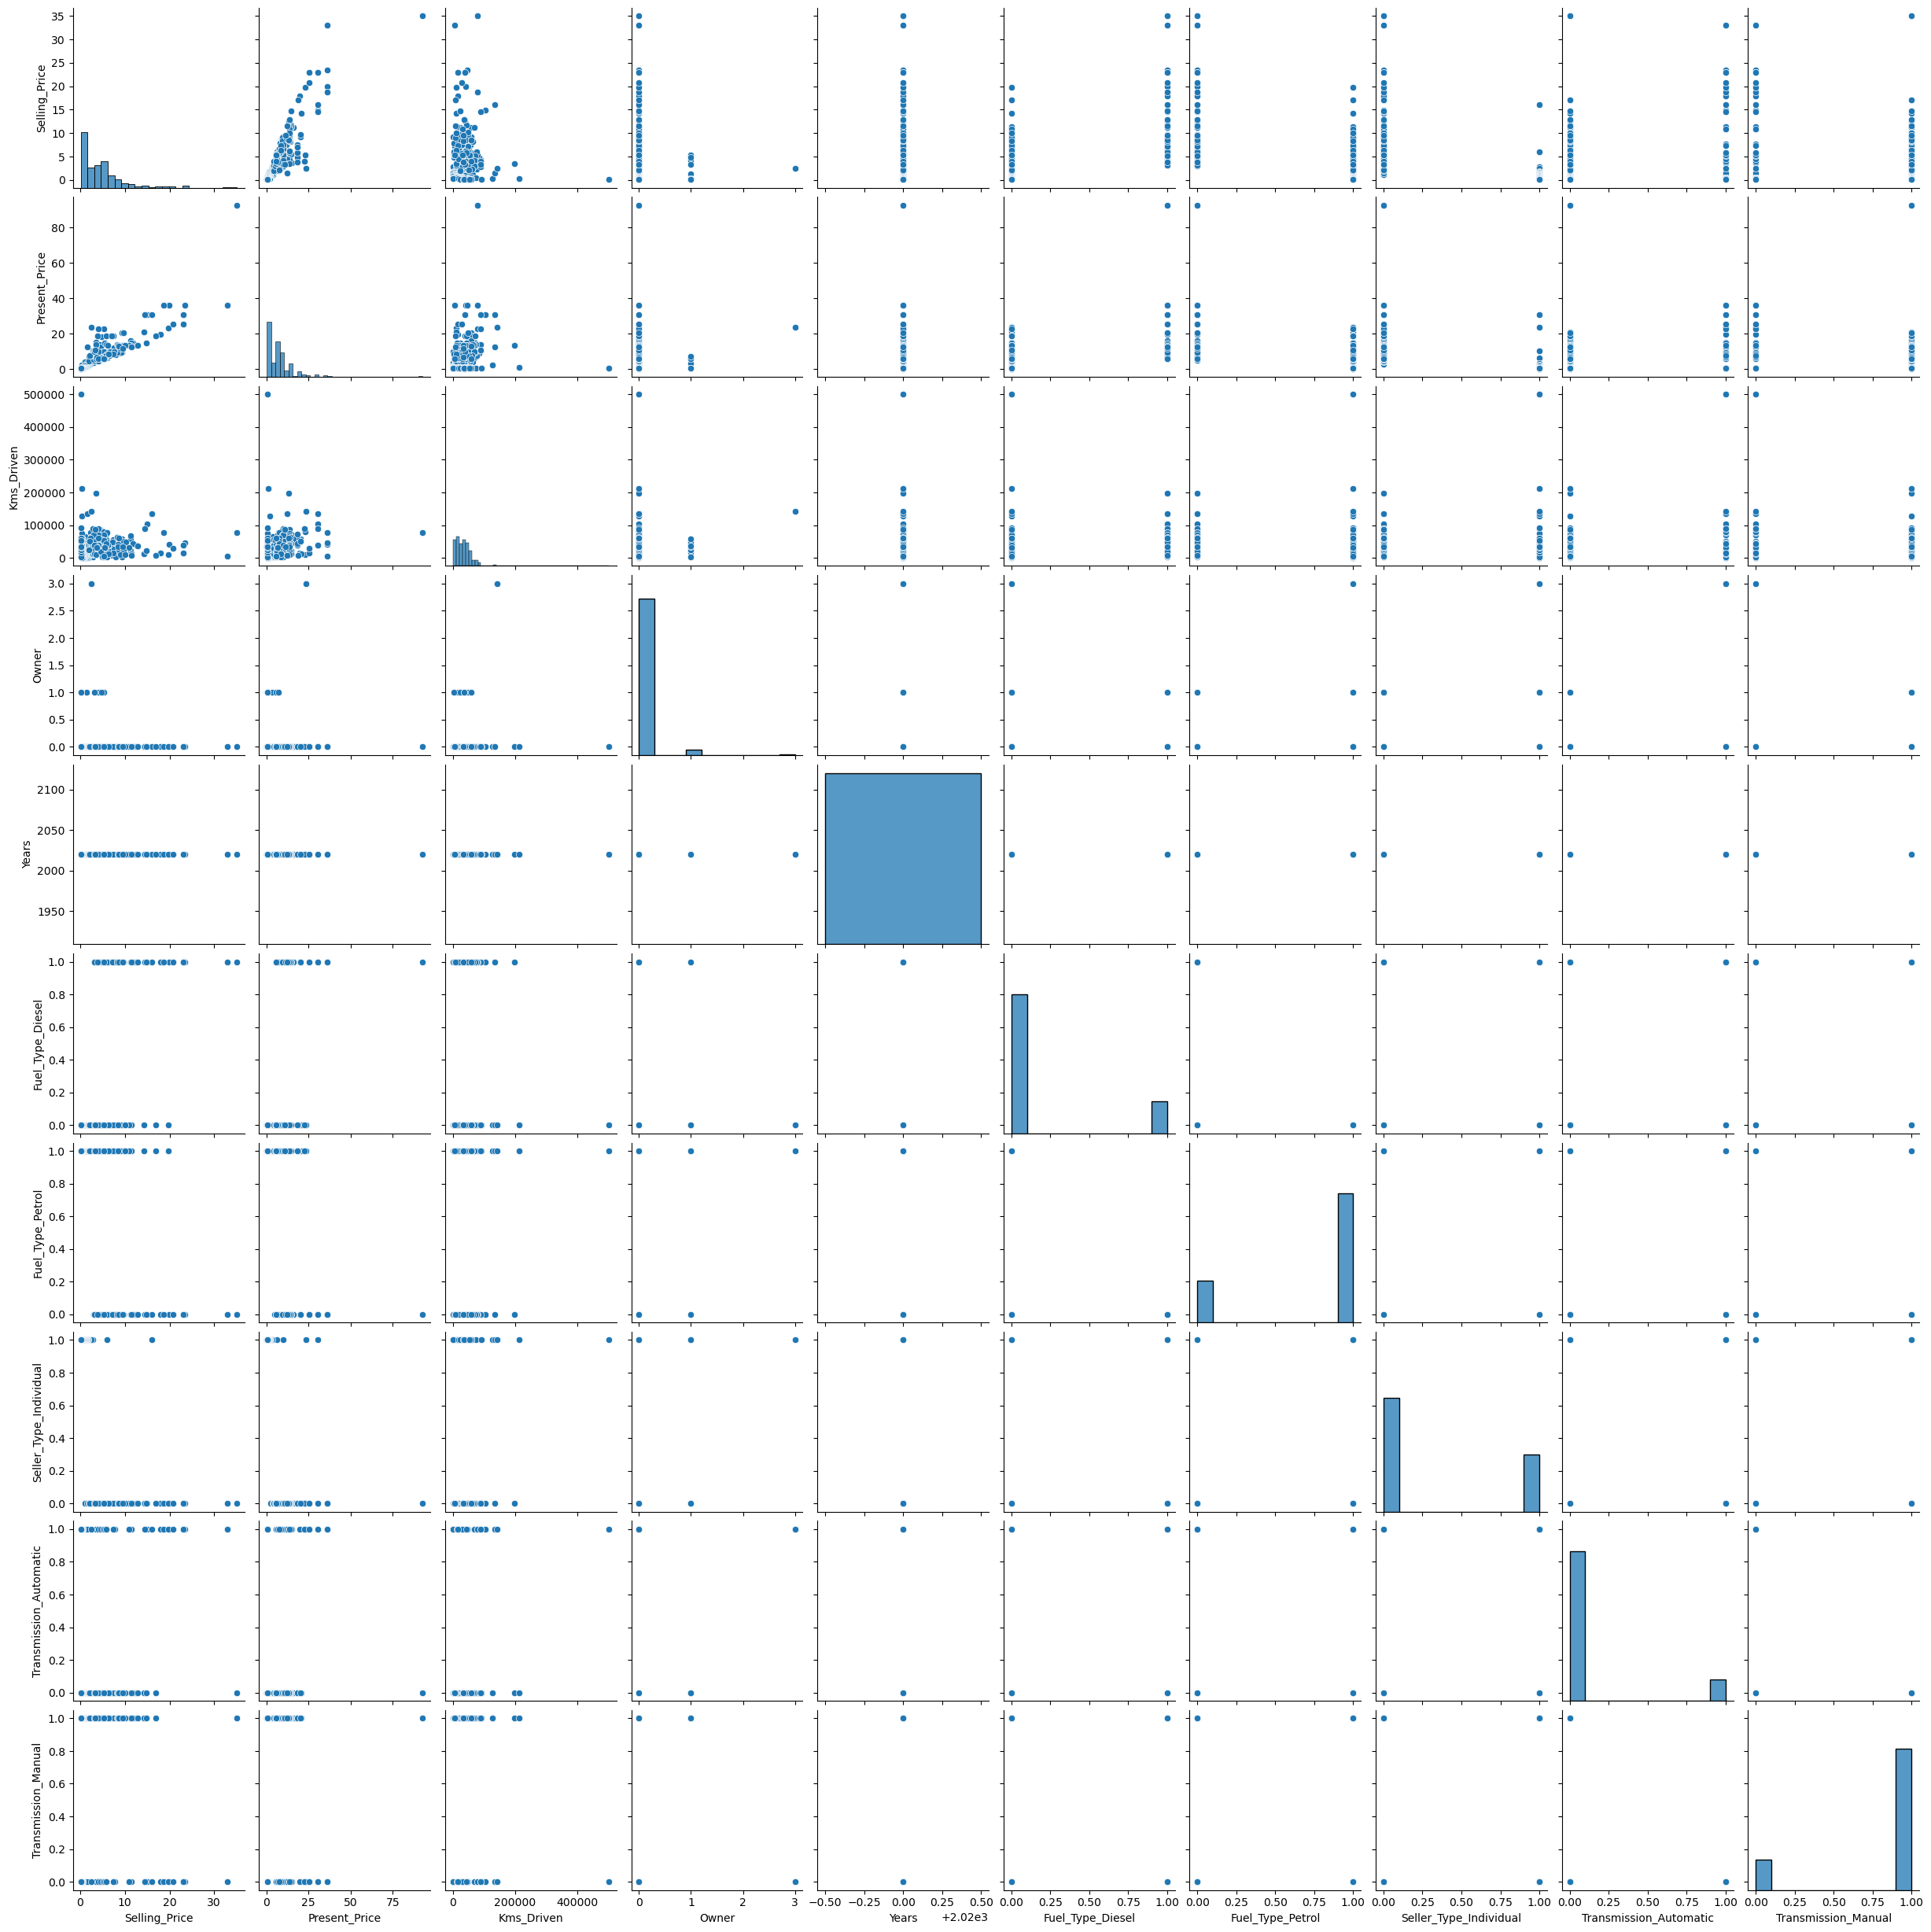

In [140]:
sns.pairplot(data=work)

<AxesSubplot:>

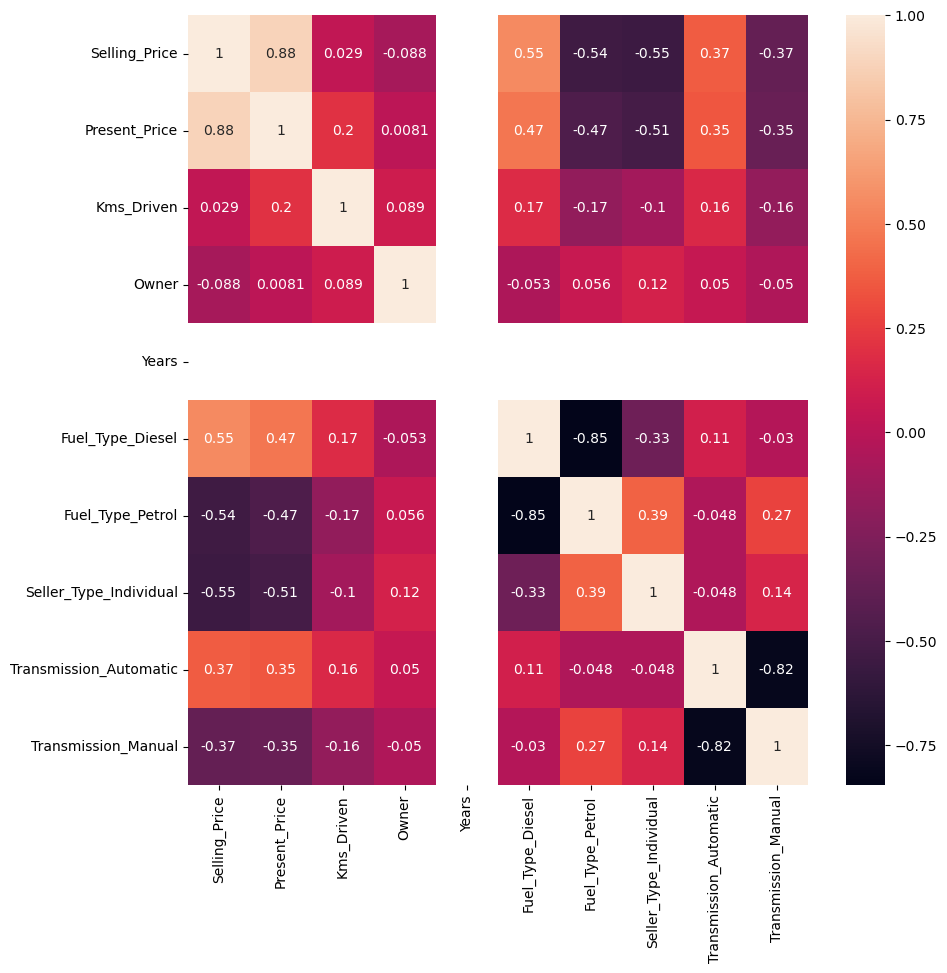

In [141]:
plt.figure(figsize=(10,10))
sns.heatmap(work.corr(),annot=True)

In [142]:
x=work.drop('Selling_Price',axis=1)
y=work['Selling_Price']

In [143]:
print(X.shape)
print(y.shape)

(317, 9)
(317,)


In [155]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)
feat_imp=pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=True)
feat_imp.plot(kind='barh')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [146]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


In [87]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_train[0])
print(X_test[0])

[0.05830082 0.04129129 0.         0.         1.         0.
 0.         0.         1.        ]
[0.05840919 0.08508509 0.         0.         0.         1.
 0.         0.         1.        ]


In [88]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [105]:
from sklearn.svm import SVR
model=SVR()
model.fit(x_train,y_train)
model.score(X_test,y_test)

NameError: name 'x_train' is not defined

In [90]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [91]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').